## Question 1
Spam filtering is an example of document classification task which involves classifying an email / SMS as spam or non-spam (a.k.a. ham).

 - Import the dataset from https://www.kaggle.com/uciml/sms-spam-collection-dataset. (1 point).
 - Split the data into training and testing. (1 point). Use 10-fold cross validation.(1 point)
 - Extract features using TF-IDF and display the features. ( 2 points)
 - Model and train the classifier using GaussianNB, BernoulliNB and MultinomialNB.( 3 points)
 - Evaluate classifiers on Test Data. ( 2 points)
 - Plot the decision boundary, visualize training and test results of all the models (3 points)

In [233]:
# importing required packages
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import nltk  
nltk.download('stopwords')  
from nltk.corpus import stopwords
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Mayank/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [205]:
model_list = []
accuracy_score_list = []
def plot_confusion_matrices(confusion_matrices):
    fig, axs = plt.subplots(2,5, figsize=(15,5)) 

    m = 0
    for i, ax_r in enumerate(axs):
        for j, ax in enumerate(ax_r):
            sns.heatmap(confusion_matrices[m], annot=True, cbar=False, cmap='Blues', fmt='g', ax = ax)
            ax.set_xlabel('Predicted label')
            ax.set_ylabel('True label')
            ax.set_title('{} {}'.format('fold', (m + 1)), fontsize=12, fontweight='bold')
            m += 1

    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                        wspace=0.35)
    plt.tight_layout()
    plt.show()

In [206]:
url = 'https://raw.githubusercontent.com/brajbhushan-tripathi/ML_Assignment/master/Question1/spam.csv'
dataset = pd.read_csv(url, delimiter=',',encoding='latin-1')
dataset.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
dataset.columns = ['class_label','email_text']
dataset.head()

,class_label,email_text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [207]:
X = dataset.email_text.values  
y = dataset.class_label

processed_email_texts = []

for text in range(0, len(X)):  
    # Remove all the special characters
    processed_email_text = re.sub(r'\W', ' ', str(X[text]))
 
    # Substituting multiple spaces with single space
    processed_email_text= re.sub(r'\s+', ' ', processed_email_text, flags=re.I)
    
    # Remove stop words from email text
    pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
    processed_email_text = pattern.sub('', processed_email_text)
  
    # Converting to Lowercase
    processed_email_text = processed_email_text.lower()

    processed_email_texts.append(processed_email_text)

In [209]:
tfidfconverter = TfidfVectorizer(
                    max_features=2000,
                    min_df=10,
                    max_df=0.9,
                    ngram_range=(1,3),
                    tokenizer=nltk.tokenize.word_tokenize
                    )
X = tfidfconverter.fit_transform(processed_email_texts).toarray()

In [231]:
d = dict(zip(tfidfconverter.get_feature_names(), tfidfconverter.idf_))
#print(d)

for k,v in d.items():
    print("Feature Name : % s , IDF Score: % s " %(k,v))

#feature_list = pd.DataFrame(d), index=range(len(tfidfconverter.get_feature_names())))
#feature_list.sample(5)

Feature Name : 00 , IDF Score: 7.227793514771165 
Feature Name : 000 , IDF Score: 6.293484277394333 
Feature Name : 03 , IDF Score: 6.986631457954278 
Feature Name : 04 , IDF Score: 7.060739430108 
Feature Name : 0800 , IDF Score: 6.986631457954278 
Feature Name : 08000839402 , IDF Score: 6.853100065329755 
Feature Name : 08000930705 , IDF Score: 6.79247544351332 
Feature Name : 1 , IDF Score: 4.513700999212993 
Feature Name : 1 50 , IDF Score: 5.98810262784315 
Feature Name : 10 , IDF Score: 5.96212714143989 
Feature Name : 100 , IDF Score: 5.888019169286168 
Feature Name : 1000 , IDF Score: 5.888019169286168 
Feature Name : 1000 cash , IDF Score: 6.447634957221591 
Feature Name : 1000 cash å , IDF Score: 6.853100065329755 
Feature Name : 10p , IDF Score: 6.447634957221591 
Feature Name : 11 , IDF Score: 6.7353170296733715 
Feature Name : 12 , IDF Score: 7.060739430108 
Feature Name : 12hrs , IDF Score: 6.7353170296733715 
Feature Name : 150 , IDF Score: 6.681249808403096 
Feature Nam

Feature Name : camcorder , IDF Score: 6.853100065329755 
Feature Name : camcorder reply , IDF Score: 7.060739430108 
Feature Name : camcorder reply call , IDF Score: 7.060739430108 
Feature Name : came , IDF Score: 6.293484277394333 
Feature Name : camera , IDF Score: 6.070340726080123 
Feature Name : can , IDF Score: 5.1039002105204965 
Feature Name : cant , IDF Score: 5.451301517673899 
Feature Name : cant pick , IDF Score: 7.060739430108 
Feature Name : cant pick phone , IDF Score: 7.060739430108 
Feature Name : car , IDF Score: 5.888019169286168 
Feature Name : card , IDF Score: 6.7353170296733715 
Feature Name : care , IDF Score: 5.349022668553481 
Feature Name : carlos , IDF Score: 6.7353170296733715 
Feature Name : case , IDF Score: 6.917638586467326 
Feature Name : cash , IDF Score: 5.2562409351025146 
Feature Name : cash await , IDF Score: 7.227793514771165 
Feature Name : cash await collection , IDF Score: 7.227793514771165 
Feature Name : cash å , IDF Score: 6.73531702967337

Feature Name : holiday , IDF Score: 5.754487776661645 
Feature Name : holiday å , IDF Score: 6.917638586467326 
Feature Name : home , IDF Score: 4.513700999212993 
Feature Name : hope , IDF Score: 4.907189916274442 
Feature Name : hope good , IDF Score: 7.140782137781536 
Feature Name : hope u , IDF Score: 7.060739430108 
Feature Name : hospital , IDF Score: 7.227793514771165 
Feature Name : hot , IDF Score: 6.490194571640386 
Feature Name : hour , IDF Score: 6.19170158308439 
Feature Name : hours , IDF Score: 6.534646334211221 
Feature Name : house , IDF Score: 5.888019169286168 
Feature Name : how , IDF Score: 4.569442982221228 
Feature Name : how come , IDF Score: 7.227793514771165 
Feature Name : how goes , IDF Score: 6.853100065329755 
Feature Name : how goes day , IDF Score: 7.227793514771165 
Feature Name : how much , IDF Score: 6.853100065329755 
Feature Name : hows , IDF Score: 6.853100065329755 
Feature Name : http , IDF Score: 6.534646334211221 
Feature Name : http www , IDF

Feature Name : love you , IDF Score: 7.227793514771165 
Feature Name : loved , IDF Score: 7.227793514771165 
Feature Name : lovely , IDF Score: 6.853100065329755 
Feature Name : loving , IDF Score: 6.7353170296733715 
Feature Name : lt , IDF Score: 4.132627344228988 
Feature Name : lt decimal , IDF Score: 6.534646334211221 
Feature Name : lt decimal gt , IDF Score: 6.534646334211221 
Feature Name : lt gt , IDF Score: 4.255050759441874 
Feature Name : lt gt i , IDF Score: 7.227793514771165 
Feature Name : lt gt min , IDF Score: 7.140782137781536 
Feature Name : ltd , IDF Score: 6.79247544351332 
Feature Name : luck , IDF Score: 7.060739430108 
Feature Name : lucky , IDF Score: 6.7353170296733715 
Feature Name : lunch , IDF Score: 5.9368093334556 
Feature Name : luv , IDF Score: 6.19170158308439 
Feature Name : m , IDF Score: 6.853100065329755 
Feature Name : m points , IDF Score: 7.060739430108 
Feature Name : m points call , IDF Score: 7.060739430108 
Feature Name : made , IDF Score: 6

Feature Name : plans , IDF Score: 7.140782137781536 
Feature Name : play , IDF Score: 5.9368093334556 
Feature Name : player , IDF Score: 6.853100065329755 
Feature Name : please , IDF Score: 4.750491464368385 
Feature Name : please call , IDF Score: 5.600337096834387 
Feature Name : please call customer , IDF Score: 7.140782137781536 
Feature Name : pls , IDF Score: 4.916158586257202 
Feature Name : pls send , IDF Score: 6.490194571640386 
Feature Name : pls send message , IDF Score: 6.986631457954278 
Feature Name : plus , IDF Score: 6.447634957221591 
Feature Name : plz , IDF Score: 6.534646334211221 
Feature Name : pm , IDF Score: 6.629956514015546 
Feature Name : po , IDF Score: 6.129181226103056 
Feature Name : po box , IDF Score: 6.367592249548054 
Feature Name : pobox , IDF Score: 6.79247544351332 
Feature Name : point , IDF Score: 6.986631457954278 
Feature Name : points , IDF Score: 6.5811663498461135 
Feature Name : points call , IDF Score: 7.060739430108 
Feature Name : pol

Feature Name : thinking , IDF Score: 6.629956514015546 
Feature Name : thinks , IDF Score: 6.917638586467326 
Feature Name : this , IDF Score: 5.050977809066153 
Feature Name : this 2nd , IDF Score: 6.681249808403096 
Feature Name : this 2nd attempt , IDF Score: 7.060739430108 
Feature Name : thk , IDF Score: 5.754487776661645 
Feature Name : tho , IDF Score: 6.681249808403096 
Feature Name : though , IDF Score: 6.293484277394333 
Feature Name : thought , IDF Score: 5.775541185859478 
Feature Name : tickets , IDF Score: 7.227793514771165 
Feature Name : til , IDF Score: 6.367592249548054 
Feature Name : till , IDF Score: 6.534646334211221 
Feature Name : time , IDF Score: 4.278581256852068 
Feature Name : time i , IDF Score: 7.227793514771165 
Feature Name : time u , IDF Score: 6.79247544351332 
Feature Name : times , IDF Score: 6.367592249548054 
Feature Name : tired , IDF Score: 6.986631457954278 
Feature Name : tmr , IDF Score: 6.293484277394333 
Feature Name : to , IDF Score: 5.093

In [ ]:
tfidf

0.8641396884230034


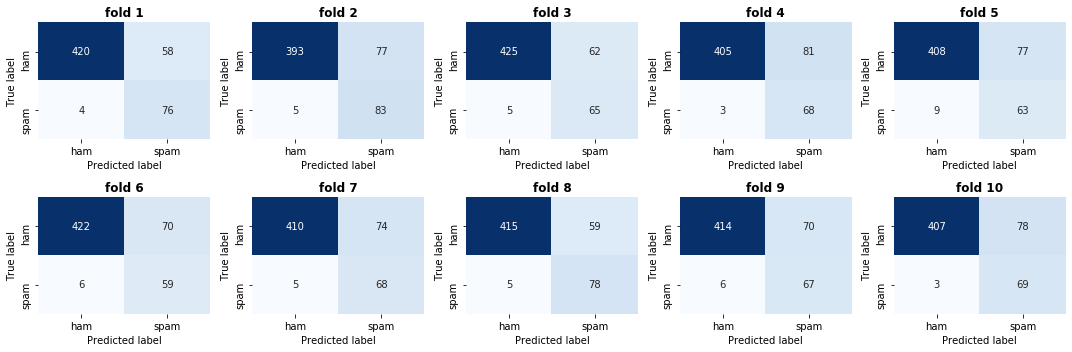

In [211]:
scores = []
m1 = GaussianNB()
model_list.append('Gaussian Naive Bayes')
conf_matrices = []

cv = KFold(n_splits=10, random_state=42, shuffle=False)
for train_index, test_index in cv.split(X):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y.iloc[train_index], y.iloc[test_index]
    m1.fit(X_train, y_train)
    y_pred = m1.predict(X_test)
    scores.append(m1.score(X_test, y_test))
    conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred), columns=['ham', 'spam'], index=['ham','spam'])
    conf_matrices.append(conf_matrix)
mean_score = np.mean(scores)
print(mean_score)
accuracy_score_list.append(mean_score)
plot_confusion_matrices(conf_matrices)

0.9847445030018728


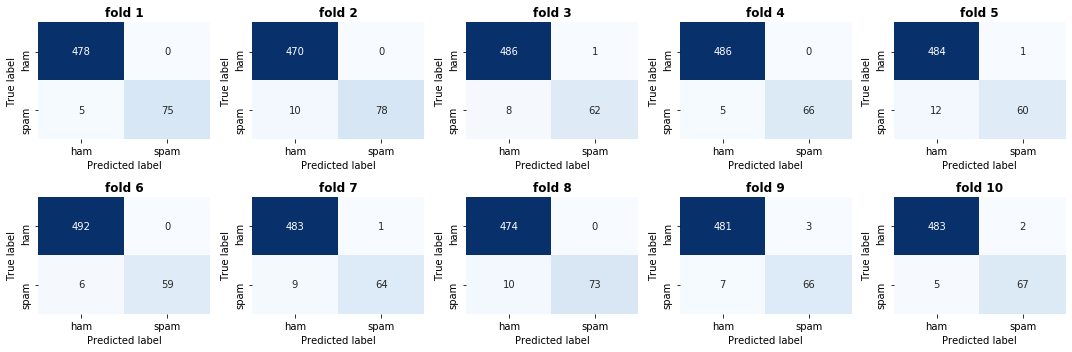

In [212]:
scores = []
m1 = MultinomialNB()
model_list.append('Multinomial Naive Bayes')
conf_matrices = []

cv = KFold(n_splits=10, random_state=42, shuffle=False)
for train_index, test_index in cv.split(X):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y.iloc[train_index], y.iloc[test_index]
    m1.fit(X_train, y_train)
    y_pred = m1.predict(X_test)
    scores.append(m1.score(X_test, y_test))
    conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred), columns=['ham', 'spam'], index=['ham','spam'])
    conf_matrices.append(conf_matrix)
mean_score = np.mean(scores)
print(mean_score)
accuracy_score_list.append(mean_score)
plot_confusion_matrices(conf_matrices)

0.985103891173272


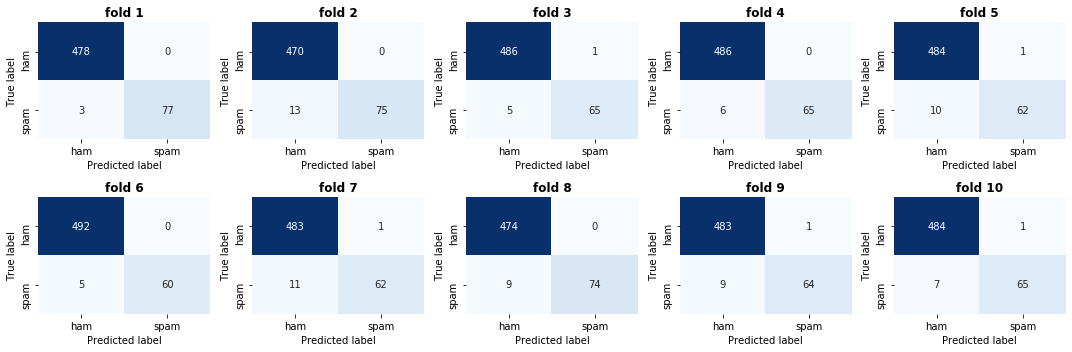

In [213]:
scores = []
m1 = BernoulliNB()
model_list.append('Bernoulli Naive Bayes')
conf_matrices = []

cv = KFold(n_splits=10, random_state=42, shuffle=False)
for train_index, test_index in cv.split(X):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y.iloc[train_index], y.iloc[test_index]
    m1.fit(X_train, y_train)
    y_pred = m1.predict(X_test)
    scores.append(m1.score(X_test, y_test))
    conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred), columns=['ham', 'spam'], index=['ham','spam'])
    conf_matrices.append(conf_matrix)
mean_score = np.mean(scores)
print(mean_score)
accuracy_score_list.append(mean_score)
plot_confusion_matrices(conf_matrices)

In [214]:
results = pd.DataFrame(accuracy_score_list, index=list(model_list), columns=['test_accuracy'])
results

,test_accuracy
Gaussian Naive Bayes,0.864140
Multinomial Naive Bayes,0.984745
Bernoulli Naive Bayes,0.985104


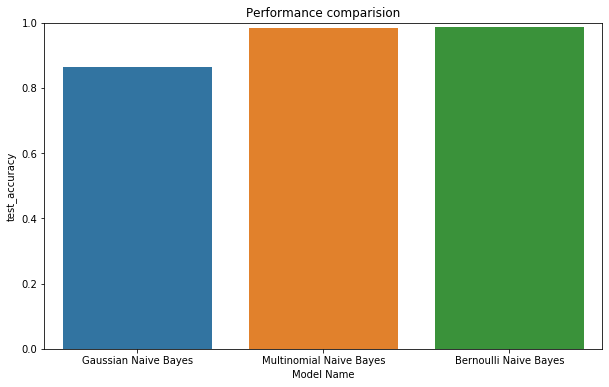

In [215]:
plt.figure(figsize=(10, 6))
sns.barplot(y ='test_accuracy', x=results.index, data=results)
plt.ylim(0., 1.0)
plt.title('Performance comparision')
plt.xlabel('Model Name')
plt.show()

In [216]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(
                    data = principalComponents,
                    columns = ['principal component 1', 'principal component 2']
                    )
df = pd.concat([principalDf, dataset.class_label], axis=1)

In [217]:
df.sample(5)

,principal component 1,principal component 2,class_label
941,-0.037566,0.006792,ham
1740,-0.096102,-0.003426,spam
102,-0.042913,0.022037,ham
1253,-0.053001,-0.021507,ham
861,-0.046032,0.012012,ham


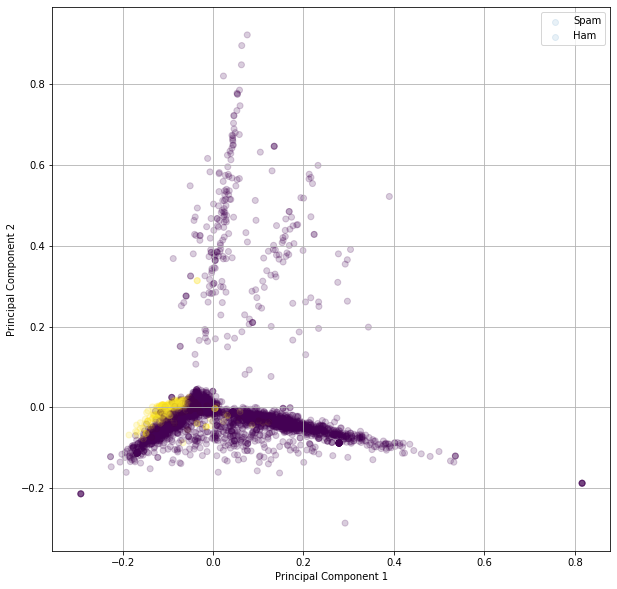

In [220]:
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(1,1,1)
class_label_map = {'spam': 1, 'ham': 0}

for label in ['Spam','Ham']:
    
    plt.scatter(df['principal component 1'], 
                df['principal component 2'],
                c=np.vectorize(class_label_map.get)(m1.predict(X)),
                marker='o',
                alpha=0.1,
                label=label
           )
    
ax.legend()
ax.grid(True)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()

In [219]:
class_label_map

{'spam': 1, 'ham': 0}